In [40]:
import os 
import re
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

/home/anverdie/Behaviour_Antonin/M788988


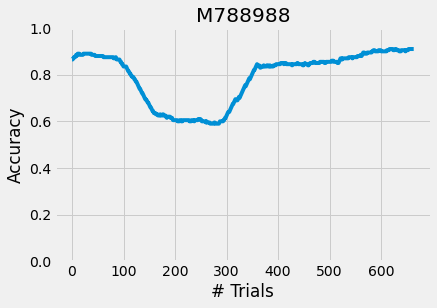

/home/anverdie/Behaviour_Antonin/M786654


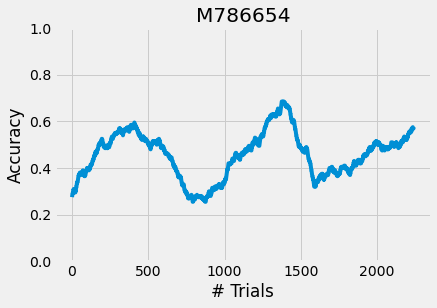

/home/anverdie/Behaviour_Antonin/M786653


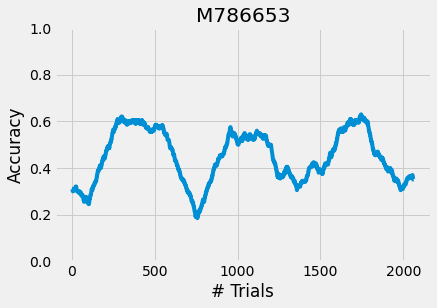

/home/anverdie/Behaviour_Antonin/M786657


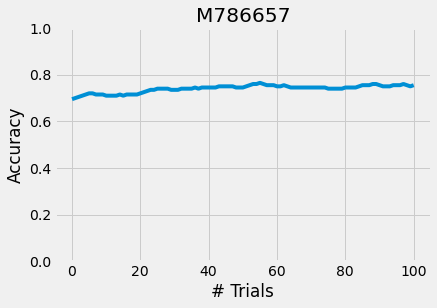

/home/anverdie/Behaviour_Antonin/M786652


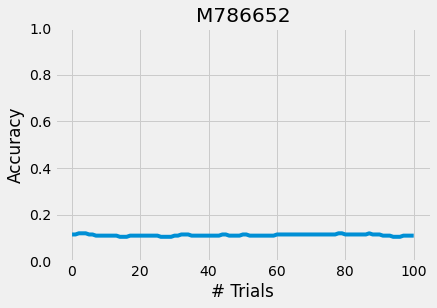

/home/anverdie/Behaviour_Antonin/M786656


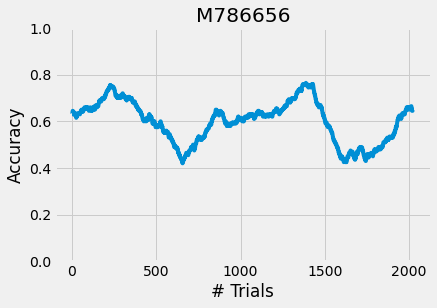

In [49]:
rootdir = '/home/anverdie/Behaviour_Antonin/'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
tag = 'GoVsBlank'
for mouse in mice:
    print(mouse)
    mouse_id = os.path.basename(os.path.normpath(mouse))
    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path]

    # Get sneakpeak into evolution 
    smoothness = 200
    corrs, stims, outs = [], [], []
    for data in datafiles:
        stims.append(data['ExperimentInfo']['TrialSequence'][0][0][0])
        corrs.append(data['ExperimentInfo']['Correct'][0][0][0])
        outs.append(data['ExperimentInfo']['OutComeTrials'][0][0][0])

    corrs = np.concatenate(corrs)
    convo_corr = np.convolve(corrs, np.ones(smoothness)/smoothness, mode='valid')
    plt.plot(convo_corr)
    plt.ylim((0, 1))
    plt.xlabel('# Trials')
    plt.ylabel('Accuracy')
    plt.title(mouse_id)
    plt.show()
